### %matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Length width type (0 = blue, red = 1)
data = [[3,  1.5,  1],
        [2,   1,   0],
        [4,  1.5,  1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_flower = [4.5, 1]

In [4]:
# Network

#    o   flower type
#  /   \ w1, w2, b
# o     o length, width


In [5]:
# Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

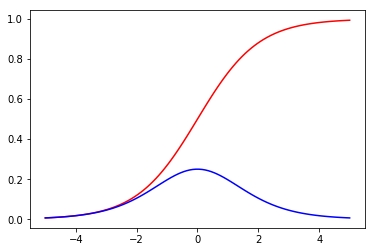

In [7]:
T = np.linspace(-5,5,100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')
plt.show()

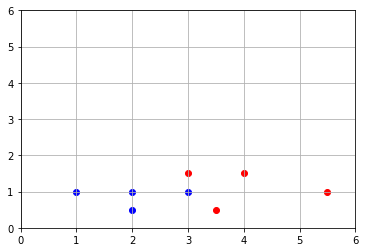

In [7]:
# Scatter data

plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c = color)

In [8]:
# Training Loop

learning_rate = 0.2
costs = []
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

# Grabs one of the point randomly, see what the network output is it,
# use that to find the cost, and try to move the derivative closer to 
# the point
for i in range(50000):
    ri = np.random.randint(len(data)) # Random input
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b # Weighted average of the points features and bias
    pred = sigmoid(z) # Application of the activation function
    
    target = point[2] 
    cost = np.square(pred - target)
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

In [9]:
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print('pred: {}'.format(pred))

[3, 1.5, 1]
pred: 0.7891570683823248
[2, 1, 0]
pred: 0.0007359202700187637
[4, 1.5, 1]
pred: 0.9997400500751562
[3, 1, 0]
pred: 0.4307619875891615
[3.5, 0.5, 1]
pred: 0.8306325663286029
[2, 0.5, 0]
pred: 0.0001488760721239953
[5.5, 1, 1]
pred: 0.9999999609542265
[1, 1, 0]
pred: 7.167326488609702e-07


In [10]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.9999598810449128

In [11]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        print("This Flower is Blue")
    else:
        print("This flower is Red")

In [12]:
which_flower(4,1.5)

This flower is Red
